In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.precision", 4)
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
# Loading the data
df = pd.read_csv('Data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state =2)



In [5]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
# Training the Logistic Regression model 
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Predicting the test values
y_pred_lr = classifier_lr.predict(X_test)

# Scoring
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

In [7]:
# Training the KNN model

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 30, p = 3, metric = 'minkowski')
classifier_knn.fit(X_train, y_train)

# Predicting the test values
y_pred_knn = classifier_knn.predict(X_test)

# Scoring
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [8]:
# Training the SVM Classifier model
from sklearn.svm import SVC
classifier_svm = SVC(random_state = 1)
classifier_svm.fit(X_train, y_train)

# Predicting the test values
y_pred_svm = classifier_svm.predict(X_test)

# Scoring
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


In [9]:
# Training the Kernel SVM model
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 97)
classifier_ksvm.fit(X_train, y_train)

# Predicting the test values
y_pred_ksvm = classifier_ksvm.predict(X_test)

# Scoring
acc_ksvm = accuracy_score(y_test, y_pred_ksvm)
f1_ksvm = f1_score(y_test, y_pred_ksvm)

In [10]:
#Results
scores = np.array([[acc_lr, f1_lr], [acc_knn, f1_knn], [acc_svm, f1_svm],
                   [acc_ksvm, f1_ksvm]])
result = pd.DataFrame(data = scores,
                      columns = ['Accuracy', 'f1 score'],
                      index = ['LR', 'KNN', 'SVM', 'KSVM'])
result.style

,Accuracy,f1 score
LR,0.9798,0.9718
KNN,0.9731,0.9625
SVM,0.9888,0.9845
KSVM,0.9888,0.9845


In [11]:
data = {'LR':acc_lr*100, 'KNN':acc_knn*100, 'SVM':acc_svm*100,
        'KSVM':acc_ksvm*100}

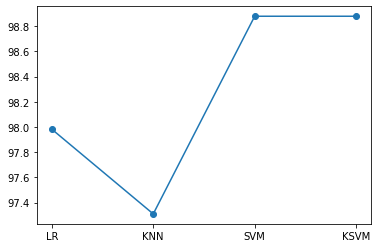

In [12]:
models = list(data.keys())
acc = list(data.values())
  
plt.plot(models,acc,'-o')
